In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sn
import os
import matplotlib.pyplot as plt
from problema1.src.preprocessing import *
from problema1.src.data_splitting import *
from problema1.src.metrics import *
from problema1.src.models import *

In [2]:
file_path = 'problema1/data/raw/cell_diagnosis_dev.csv'
df = pd.read_csv(file_path)

# visualise null table
null_table = null_analysis(df)
px.bar(null_table.reset_index(), x='index', y='percentage', text='counts', height=500)


Debido a la alta cantidad de datos faltantes que habia en el dataset, decidi no remover los Nans, y reemplazarlos por la media de la feature

306 (23.01%) outliers removed
102 (30.63%) outliers removed


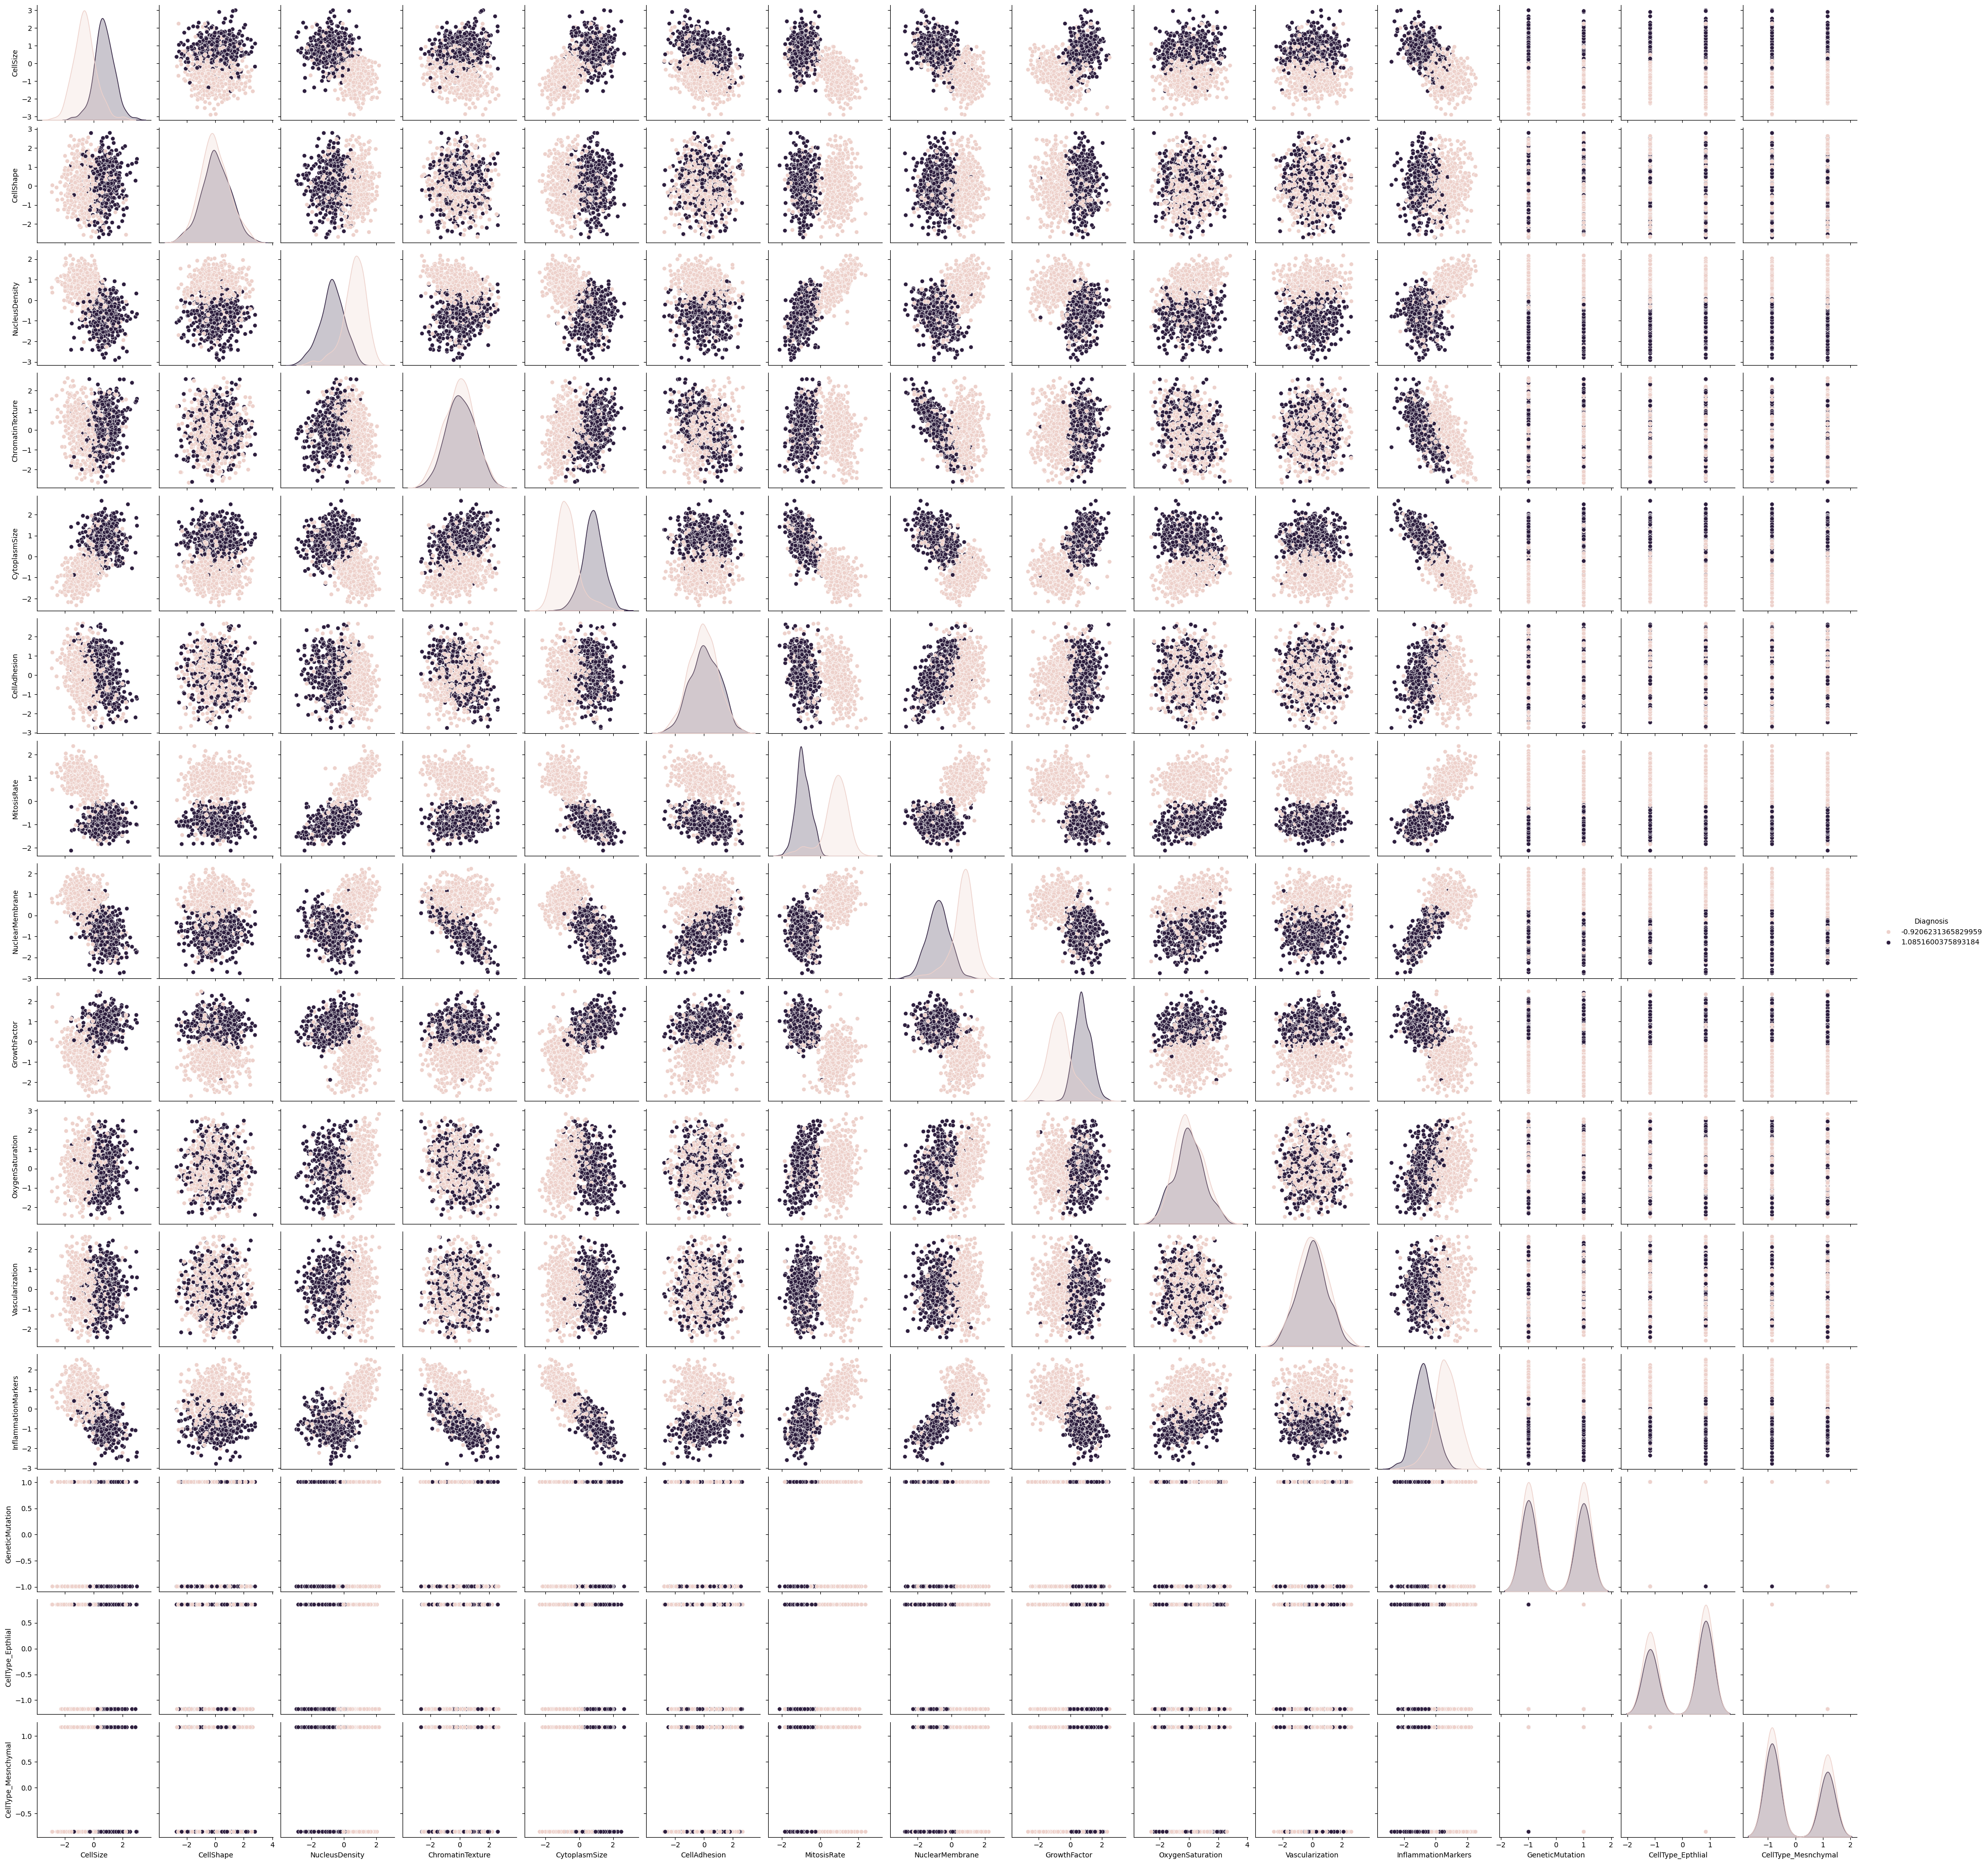

In [ ]:
df_train, df_val = train_val_split(df)

df_train = replace_question_marks_with_nan(df_train,'CellType')
df_train = knn_impute_all(df_train) 
df_train = boxplot_outlier_removal(df_train,exclude=['Diagnosis','CellType','GeneticMutation'])
df_train = one_hot_encode_column(df_train,'CellType')
df_train = convert_to_binary(df_train,'GeneticMutation')
df_train, stats1 = normalize_columns(df_train, exclude_cols=['Diagnosis','GeneticMutation','CellType_Epthlial','CellType_Mesnchymal'])
df_train.to_csv('problema1/data/processed/train_cleaned_cell_diagnosis_dev.csv', index=False)

df_val = replace_question_marks_with_nan(df_val,'CellType')
df_val = knn_impute_all(df_val) 
df_val = boxplot_outlier_removal(df_val,exclude=['Diagnosis','CellType','GeneticMutation'])
df_val = one_hot_encode_column(df_val,'CellType')
df_val = convert_to_binary(df_val,'GeneticMutation')
df_val, stats2 = normalize_columns(df_val, exclude_cols=['Diagnosis','GeneticMutation','CellType_Epthlial','CellType_Mesnchymal'])
df_val.to_csv('problema1/data/processed/val_cleaned_cell_diagnosis_dev.csv', index=False)

sn.pairplot(df_train, hue='Diagnosis')

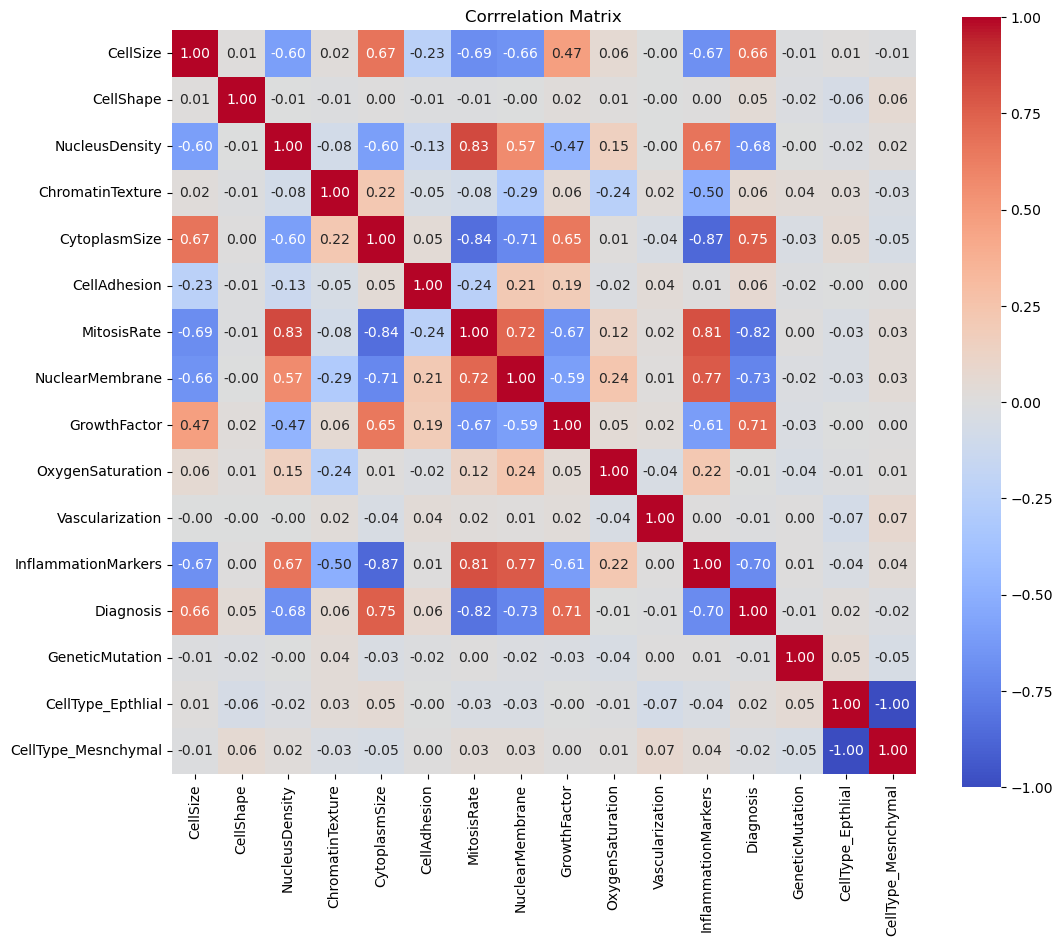

In [4]:
matrix = df_train.corr()

plt.figure(figsize=(12,10))
sn.heatmap(matrix,annot=True, fmt=".2f",cmap='coolwarm',square=True)
plt.title('Corrrelation Matrix')
plt.show()

Iteration 100, Loss: -1.230833
Iteration 200, Loss: -2.334379
Iteration 300, Loss: -3.356176
Iteration 400, Loss: -4.358692
Iteration 500, Loss: -5.354394
Iteration 600, Loss: -6.346966
Iteration 700, Loss: -7.337831
Iteration 800, Loss: -8.327649
Iteration 900, Loss: -9.300346
Iteration 1000, Loss: -10.235936


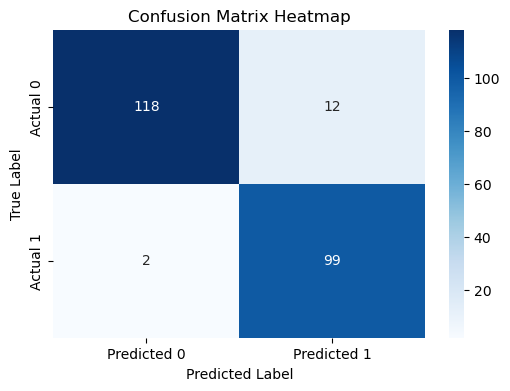

Precision: 0.8918918918918919
Reacall: 0.9801980198019802
Accuracy: 0.9393939393939394


In [5]:
X_train = df_train.drop(columns=['Diagnosis'])
Y_train = df_train['Diagnosis']

X_val = df_val.drop(columns=['Diagnosis'])
Y_val = df_val['Diagnosis']

model = LogisticRegressionL2()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_val)


conf_matrix = calculate_confusion_matrix(Y_val,Y_pred)

plt.figure(figsize=(6, 4))  # Set figure size
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
    
# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()

precision = calculate_precision(Y_val, Y_pred)
print(f'Precision: {precision}')

recall = calculate_recall(Y_val, Y_pred)
print(f'Reacall: {recall}')

accuracy = calculate_accuracy(Y_val, Y_pred)
print(f'Accuracy: {accuracy}')